In [14]:
#Import statments and plot figures inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [200]:
# Global variables to define ranges between segments

NEVER_ORGANIC_MAX = 0.1
MID = 0.5
SUPER_ORGANIC_MIN = 0.9

In [169]:
# Read in the produce dataset and drop the column of index from the previous table (no longer valid indices)
organic = pd.read_csv('produce_dataset.csv').drop('Unnamed: 0', axis =1)

# Initialize a total_produce_purchased column with all 1's 
organic['total_produce_purchased'] = 1

# Create a organic? column containing 1 for an organic produce, 0 for a non-organic produce
organic['organic?'] = organic['product_name'].str.contains('Organic').astype(int)

In [170]:
organic

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,total_produce_purchased,organic?
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,1,1
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,1,1
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,1,0
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,1,0
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888373,206209,12,626363,1,12,18.0,43961,Organic Peeled Whole Baby Carrots,10,1,123,packaged vegetables fruits,1,1
9888374,206209,12,626363,1,12,18.0,5622,Cocktail Tomatoes on the Vine,18,0,123,packaged vegetables fruits,1,0
9888375,206209,12,626363,1,12,18.0,14727,Yellow Onion,20,0,123,packaged vegetables fruits,1,0
9888376,206209,13,2977660,1,12,7.0,24852,Banana,1,1,24,fresh fruits,1,0


## QUESTION 3
Is "buying organic" a stable or dynamic behavior?

In [171]:
# Create series data for produce per order and organic produce per order

produce_per_order = organic.groupby(['user_id', 'order_number', 'order_id'])['total_produce_purchased'].sum()
organic_per_order = organic.groupby(['user_id', 'order_number', 'order_id'])['organic?'].sum()

In [172]:
produce_per_order

user_id  order_number  order_id
1        2             2398795     1
         5             431534      4
2        1             2168274     4
         2             1501582     2
         3             1901567     1
                                  ..
206209   10            2266710     1
         11            1854736     1
         12            626363      5
         13            2977660     1
         14            272231      1
Name: total_produce_purchased, Length: 2506247, dtype: int64

In [173]:
organic_per_order

user_id  order_number  order_id
1        2             2398795     1
         5             431534      2
2        1             2168274     3
         2             1501582     1
         3             1901567     1
                                  ..
206209   10            2266710     0
         11            1854736     0
         12            626363      1
         13            2977660     0
         14            272231      0
Name: organic?, Length: 2506247, dtype: int64

In [174]:
# Combine the series into a new dataset called user_behavior
user_behavior = pd.concat([produce_per_order, organic_per_order], axis=1).reset_index()

# Rename the organic? column
user_behavior.rename(columns = {'organic?':'organic_produce_purchased'}, inplace = True) 
user_behavior

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased
0,1,2,2398795,1,1
1,1,5,431534,4,2
2,2,1,2168274,4,3
3,2,2,1501582,2,1
4,2,3,1901567,1,1
...,...,...,...,...,...
2506242,206209,10,2266710,1,0
2506243,206209,11,1854736,1,0
2506244,206209,12,626363,5,1
2506245,206209,13,2977660,1,0


In [175]:
# Create a new column of total order count for a user
user_behavior['order_count'] = user_behavior.groupby('user_id').user_id.transform('count')
user_behavior.head(30)

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count
0,1,2,2398795,1,1,2
1,1,5,431534,4,2,2
2,2,1,2168274,4,3,15
3,2,2,1501582,2,1,15
4,2,3,1901567,1,1,15
5,2,4,738281,3,2,15
6,2,5,1673511,1,1,15
7,2,6,1199898,5,2,15
8,2,7,3194192,4,1,15
9,2,8,788338,3,1,15


count    194331.000000
mean         12.896795
std          14.421578
min           1.000000
25%           4.000000
50%           8.000000
75%          16.000000
max         100.000000
Name: order_count, dtype: float64

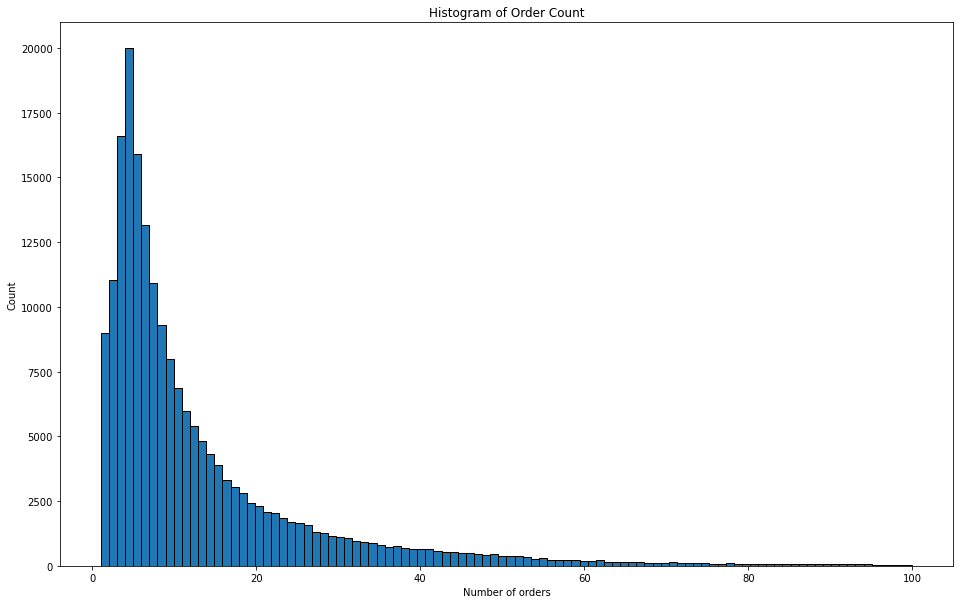

In [176]:
# Plot the count of users who had x number of orders

plt.figure(figsize=(16,10))

plt.hist(user_behavior.drop_duplicates(subset=['user_id'])['order_count'], bins = 100, edgecolor = 'black')

plt.title('Histogram of Order Count')
plt.xlabel('Number of orders')
plt.ylabel('Count')
pass

# Describe the stats of the order_count
user_behavior.drop_duplicates(subset=['user_id'])['order_count'].describe()

In [177]:
# Drop the users who had less than 10 orders
user_behavior10 = user_behavior.drop(user_behavior[user_behavior['order_count'] < 10].index, axis=0)
user_behavior10

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count
2,2,1,2168274,4,3,15
3,2,2,1501582,2,1,15
4,2,3,1901567,1,1,15
5,2,4,738281,3,2,15
6,2,5,1673511,1,1,15
...,...,...,...,...,...,...
2506242,206209,10,2266710,1,0,11
2506243,206209,11,1854736,1,0,11
2506244,206209,12,626363,5,1,11
2506245,206209,13,2977660,1,0,11


In [178]:
# Re-assign the order_number column to be sequential from 1 to number of orders per user
user_behavior10['order_number'] = user_behavior10.groupby('user_id').cumcount() + 1
user_behavior10.head(30)

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count
2,2,1,2168274,4,3,15
3,2,2,1501582,2,1,15
4,2,3,1901567,1,1,15
5,2,4,738281,3,2,15
6,2,5,1673511,1,1,15
7,2,6,1199898,5,2,15
8,2,7,3194192,4,1,15
9,2,8,788338,3,1,15
10,2,9,1718559,2,0,15
11,2,10,1447487,2,1,15


In [179]:
# Check to make sure each first order number is 1
user_behavior10.drop_duplicates(subset=['user_id'])

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count
2,2,1,2168274,4,3,15
17,3,1,1374495,6,2,12
38,7,1,2565571,2,1,20
92,14,1,2906263,1,0,14
112,17,1,1681401,1,0,14
...,...,...,...,...,...,...
2506133,206202,1,2554068,7,2,18
2506164,206206,1,1685630,14,13,11
2506175,206207,1,2166133,6,5,16
2506191,206208,1,2227043,5,4,45


In [180]:
# Create a new 'organic_%' column that is the percentage of organic produce purchased over total produce purchased

user_behavior10['organic_%'] = user_behavior10['organic_produce_purchased']/user_behavior10['total_produce_purchased']
user_behavior10

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count,organic_%
2,2,1,2168274,4,3,15,0.750000
3,2,2,1501582,2,1,15,0.500000
4,2,3,1901567,1,1,15,1.000000
5,2,4,738281,3,2,15,0.666667
6,2,5,1673511,1,1,15,1.000000
...,...,...,...,...,...,...,...
2506242,206209,7,2266710,1,0,11,0.000000
2506243,206209,8,1854736,1,0,11,0.000000
2506244,206209,9,626363,5,1,11,0.200000
2506245,206209,10,2977660,1,0,11,0.000000


In [181]:
# Create a dataframe with the simple moving average over 5 rows per user
df_SMA = user_behavior10.groupby('user_id')['organic_%'].rolling(window=5).mean().reset_index(level=[0,1])
df_SMA.set_index('level_1', inplace=True)
df_SMA.rename(columns = {'organic_%':'organic_%_SMA5'}, inplace = True) 
df_SMA.drop('user_id', axis=1, inplace=True)
df_SMA

,organic_%_SMA5
level_1,
2,NaN
3,NaN
4,NaN
5,NaN
6,0.783333
...,...
2506242,0.733333
2506243,0.533333
2506244,0.440000


In [182]:
# Create a dataframe with the culmulative moving average starting from row 5 per user
df_CMA = user_behavior10.groupby('user_id')['organic_%'].expanding(min_periods=5).mean().reset_index(level=[0,1])
df_CMA.set_index('level_1', inplace=True)
df_CMA.rename(columns = {'organic_%':'organic_%_CMA5'}, inplace = True) 
df_CMA.drop('user_id', axis=1, inplace=True)
df_CMA

,organic_%_CMA5
level_1,
2,NaN
3,NaN
4,NaN
5,NaN
6,0.783333
...,...
2506242,0.666667
2506243,0.583333
2506244,0.540741


In [183]:
# Join the SMA and CMA dataframes to the original dataframe

user_behavior10 = user_behavior10.join(df_SMA)
user_behavior10 = user_behavior10.join(df_CMA)

In [184]:
user_behavior10.head(30)

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count,organic_%,organic_%_SMA5,organic_%_CMA5
2,2,1,2168274,4,3,15,0.750000,NaN,NaN
3,2,2,1501582,2,1,15,0.500000,NaN,NaN
4,2,3,1901567,1,1,15,1.000000,NaN,NaN
5,2,4,738281,3,2,15,0.666667,NaN,NaN
6,2,5,1673511,1,1,15,1.000000,0.783333,0.783333
7,2,6,1199898,5,2,15,0.400000,0.713333,0.719444
8,2,7,3194192,4,1,15,0.250000,0.663333,0.652381
9,2,8,788338,3,1,15,0.333333,0.530000,0.612500
10,2,9,1718559,2,0,15,0.000000,0.396667,0.544444
11,2,10,1447487,2,1,15,0.500000,0.296667,0.540000


In [201]:
# Create a new 'segment' column and initialize it with NaN
user_behavior10['segment_SMA5'] = np.NaN

# Set up the customer segments per the percentage ranges below and assign the values to the 'segment' column
user_behavior10.loc[user_behavior10['organic_%_SMA5'] < NEVER_ORGANIC_MAX, 'segment_SMA5'] = 'Never Organic'
user_behavior10.loc[(user_behavior10['organic_%_SMA5'] >= NEVER_ORGANIC_MAX) & 
                    (user_behavior10['organic_%_SMA5'] < MID), 'segment_SMA5'] = 'Organic Taster'
user_behavior10.loc[(user_behavior10['organic_%_SMA5'] >= MID) & 
                    (user_behavior10['organic_%_SMA5'] < SUPER_ORGANIC_MIN), 'segment_SMA5'] = 'Light Organic'
user_behavior10.loc[user_behavior10['organic_%_SMA5'] >= SUPER_ORGANIC_MIN, 'segment_SMA5'] = 'Super Organic'

In [202]:
# Create a new 'segment' column and initialize it with NaN
user_behavior10['segment_CMA5'] = np.NaN

# Set up the customer segments per the percentage ranges below and assign the values to the 'segment' column
user_behavior10.loc[user_behavior10['organic_%_CMA5'] < NEVER_ORGANIC_MAX, 'segment_CMA5'] = 'Never Organic'
user_behavior10.loc[(user_behavior10['organic_%_CMA5'] >= NEVER_ORGANIC_MAX) & 
                    (user_behavior10['organic_%_CMA5'] < MID), 'segment_CMA5'] = 'Organic Taster'
user_behavior10.loc[(user_behavior10['organic_%_CMA5'] >= MID) & 
                    (user_behavior10['organic_%_CMA5'] < SUPER_ORGANIC_MIN), 'segment_CMA5'] = 'Light Organic'
user_behavior10.loc[user_behavior10['organic_%_CMA5'] >= SUPER_ORGANIC_MIN, 'segment_CMA5'] = 'Super Organic'

In [203]:
user_behavior10.dropna(inplace=True)

In [204]:
user_behavior10

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count,organic_%,organic_%_SMA5,organic_%_CMA5,segment_SMA5,segment_CMA5
6,2,5,1673511,1,1,15,1.000000,0.783333,0.783333,Light Organic,Light Organic
7,2,6,1199898,5,2,15,0.400000,0.713333,0.719444,Light Organic,Light Organic
8,2,7,3194192,4,1,15,0.250000,0.663333,0.652381,Light Organic,Light Organic
9,2,8,788338,3,1,15,0.333333,0.530000,0.612500,Light Organic,Light Organic
10,2,9,1718559,2,0,15,0.000000,0.396667,0.544444,Organic Taster,Light Organic
...,...,...,...,...,...,...,...,...,...,...,...
2506242,206209,7,2266710,1,0,11,0.000000,0.733333,0.666667,Light Organic,Light Organic
2506243,206209,8,1854736,1,0,11,0.000000,0.533333,0.583333,Light Organic,Light Organic
2506244,206209,9,626363,5,1,11,0.200000,0.440000,0.540741,Organic Taster,Light Organic
2506245,206209,10,2977660,1,0,11,0.000000,0.240000,0.486667,Organic Taster,Organic Taster


In [205]:
# Create a new, clean dataset for plotting SMA5 data
plot_SMA5_df = user_behavior10.groupby('order_number')['segment_SMA5'].value_counts().to_frame(name = 'users').reset_index()
plot_SMA5_df

,order_number,segment_SMA5,users
0,5,Light Organic,34533
1,5,Organic Taster,28062
2,5,Never Organic,9436
3,5,Super Organic,8428
4,6,Light Organic,34364
...,...,...,...
379,99,Super Organic,3
380,100,Light Organic,9
381,100,Organic Taster,6
382,100,Never Organic,3


In [206]:
# Create a new, clean dataset for plotting CMA5 data
plot_CMA5_df = user_behavior10.groupby('order_number')['segment_CMA5'].value_counts().to_frame(name = 'users').reset_index()
plot_CMA5_df

,order_number,segment_CMA5,users
0,5,Light Organic,34511
1,5,Organic Taster,28083
2,5,Never Organic,9437
3,5,Super Organic,8428
4,6,Light Organic,35243
...,...,...,...
379,99,Super Organic,3
380,100,Organic Taster,9
381,100,Light Organic,8
382,100,Never Organic,2


In [207]:
# Create a new column in each plotting dataset that shows the percentage of users per segment per order
plot_SMA5_df['%_users'] = plot_SMA5_df.users.div(plot_SMA5_df.order_number.map(plot_SMA5_df.groupby('order_number').sum().users))
plot_CMA5_df['%_users'] = plot_CMA5_df.users.div(plot_CMA5_df.order_number.map(plot_CMA5_df.groupby('order_number').sum().users))

plot_SMA5_df.head(30)

,order_number,segment_SMA5,users,%_users
0,5,Light Organic,34533,0.429200
1,5,Organic Taster,28062,0.348774
2,5,Never Organic,9436,0.117277
3,5,Super Organic,8428,0.104749
4,6,Light Organic,34364,0.427100
5,6,Organic Taster,28113,0.349408
6,6,Never Organic,9488,0.117923
7,6,Super Organic,8494,0.105569
8,7,Light Organic,34198,0.425036
9,7,Organic Taster,28151,0.349880


In [208]:
plot_CMA5_df.head(30)

,order_number,segment_CMA5,users,%_users
0,5,Light Organic,34511,0.428927
1,5,Organic Taster,28083,0.349035
2,5,Never Organic,9437,0.117290
3,5,Super Organic,8428,0.104749
4,6,Light Organic,35243,0.438024
5,6,Organic Taster,27830,0.345890
6,6,Never Organic,9864,0.122597
7,6,Super Organic,7522,0.093489
8,7,Light Organic,35608,0.442561
9,7,Organic Taster,28295,0.351670


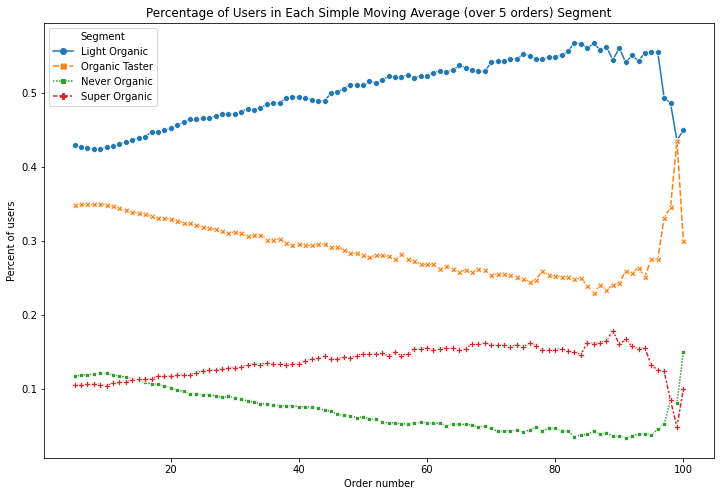

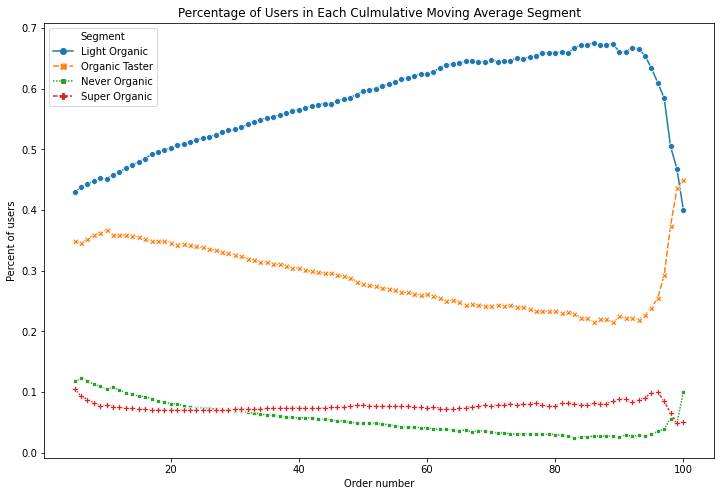

In [209]:
# Plot the percentage of users per order separated into the segments by a simple moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=plot_SMA5_df, x="order_number", y = '%_users', hue="segment_SMA5", style='segment_SMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Percentage of Users in Each Simple Moving Average (over 5 orders) Segment')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass

# Plot the percentage of users per order separated into the segments by a culmulative moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=plot_CMA5_df, x="order_number", y = '%_users', hue="segment_CMA5", style='segment_CMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Percentage of Users in Each Culmulative Moving Average Segment')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass

### Never Organic
What is the evolution of organic purchasing behavior of users who started off as Never Organic?

In [210]:
# Create a dataset of users who started off as Never Organic (order_number = 5)

# List of users who started off as Never Organic
N_O_list = user_behavior10[(user_behavior10['order_number'] == 5) & 
                            (user_behavior10['segment_CMA5'] == 'Never Organic')]['user_id'].tolist()

N_O_df = user_behavior10[user_behavior10['user_id'].isin(N_O_list)]
N_O_df

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count,organic_%,organic_%_SMA5,organic_%_CMA5,segment_SMA5,segment_CMA5
116,17,5,603376,1,0,14,0.00,9.992007e-17,0.000000,Never Organic,Never Organic
117,17,6,1683378,1,0,14,0.00,9.992007e-17,0.000000,Never Organic,Never Organic
118,17,7,2795254,1,0,14,0.00,9.992007e-17,0.000000,Never Organic,Never Organic
119,17,8,1385847,1,0,14,0.00,9.992007e-17,0.000000,Never Organic,Never Organic
120,17,9,3314059,1,0,14,0.00,9.992007e-17,0.000000,Never Organic,Never Organic
...,...,...,...,...,...,...,...,...,...,...,...
2505876,206180,14,975682,8,2,18,0.25,2.452381e-01,0.161565,Organic Taster,Organic Taster
2505877,206180,15,961976,5,1,18,0.20,2.852381e-01,0.164127,Organic Taster,Organic Taster
2505878,206180,16,2087254,10,2,18,0.20,2.585714e-01,0.166369,Organic Taster,Organic Taster
2505879,206180,17,766731,3,0,18,0.00,1.585714e-01,0.156583,Organic Taster,Organic Taster


In [211]:
N_O_plot_df = N_O_df.groupby('order_number')['segment_CMA5'].value_counts().to_frame(name = 'users').reset_index()
N_O_plot_df['%_users'] = N_O_plot_df.users.div(N_O_plot_df.order_number.map(N_O_plot_df.groupby('order_number').sum().users))

N_O_plot_df.head(30)

,order_number,segment_CMA5,users,%_users
0,5,Never Organic,9437,1.000000
1,6,Never Organic,8610,0.912366
2,6,Organic Taster,827,0.087634
3,7,Never Organic,8190,0.867861
4,7,Organic Taster,1247,0.132139
5,8,Never Organic,7763,0.822613
6,8,Organic Taster,1674,0.177387
7,9,Never Organic,7467,0.791247
8,9,Organic Taster,1970,0.208753
9,10,Never Organic,7123,0.754795


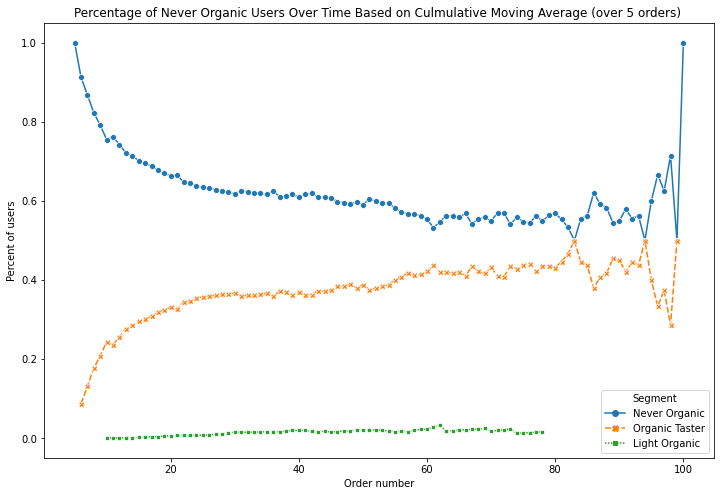

In [212]:
# Plot the percentage of users per order separated into the segments by a culmulative moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=N_O_plot_df, x="order_number", y = '%_users', hue="segment_CMA5", style='segment_CMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Percentage of Never Organic Users Over Time Based on Culmulative Moving Average (over 5 orders) ')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass

### Organic Taster
What is the evolution of organic purchasing behavior of users who started off as Organic Taster?

In [213]:
# Create a dataset of users who started off as Organic Taster (order_number = 5)

# List of users who started off as Organic Taster
O_T_list = user_behavior10[(user_behavior10['order_number'] == 5) & 
                            (user_behavior10['segment_CMA5'] == 'Organic Taster')]['user_id'].tolist()

O_T_df = user_behavior10[user_behavior10['user_id'].isin(O_T_list)]

O_T_plot_df = O_T_df.groupby('order_number')['segment_CMA5'].value_counts().to_frame(name = 'users').reset_index()
O_T_plot_df['%_users'] = O_T_plot_df.users.div(O_T_plot_df.order_number.map(O_T_plot_df.groupby('order_number').sum().users))

O_T_plot_df.head(30)

,order_number,segment_CMA5,users,%_users
0,5,Organic Taster,28083,1.000000
1,6,Organic Taster,25048,0.891928
2,6,Light Organic,1781,0.063419
3,6,Never Organic,1254,0.044653
4,7,Organic Taster,24294,0.865079
5,7,Light Organic,2450,0.087241
6,7,Never Organic,1339,0.047680
7,8,Organic Taster,23851,0.849304
8,8,Light Organic,2948,0.104975
9,8,Never Organic,1284,0.045722


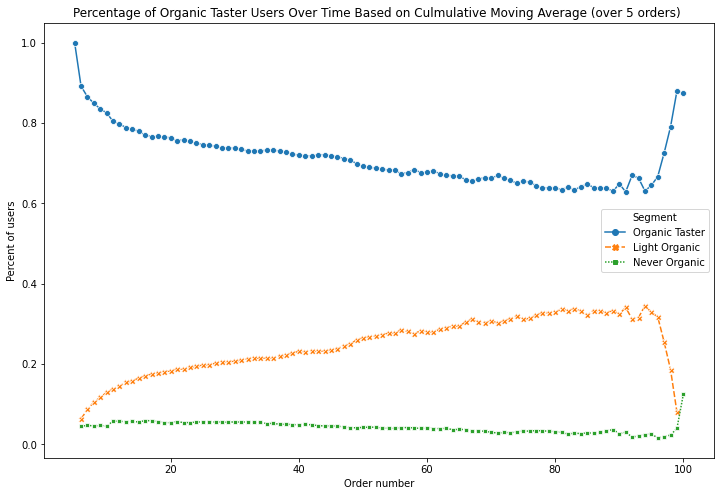

In [214]:
# Plot the percentage of users per order separated into the segments by a culmulative moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=O_T_plot_df, x="order_number", y = '%_users', hue="segment_CMA5", style='segment_CMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Percentage of Organic Taster Users Over Time Based on Culmulative Moving Average (over 5 orders) ')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass

### Light Organic
What is the evolution of organic purchasing behavior of users who started off as Light Organic?

In [215]:
# Create a dataset of users who started off as Light Organic (order_number = 5)

# List of users who started off as Light Organic
L_O_list = user_behavior10[(user_behavior10['order_number'] == 5) & 
                            (user_behavior10['segment_CMA5'] == 'Light Organic')]['user_id'].tolist()

L_O_df = user_behavior10[user_behavior10['user_id'].isin(L_O_list)]

L_O_plot_df = L_O_df.groupby('order_number')['segment_CMA5'].value_counts().to_frame(name = 'users').reset_index()
L_O_plot_df['%_users'] = L_O_plot_df.users.div(L_O_plot_df.order_number.map(L_O_plot_df.groupby('order_number').sum().users))

L_O_plot_df.head(30)

,order_number,segment_CMA5,users,%_users
0,5,Light Organic,34511,1.000000
1,6,Light Organic,32111,0.930457
2,6,Organic Taster,1955,0.056649
3,6,Super Organic,445,0.012894
4,7,Light Organic,31119,0.901712
5,7,Organic Taster,2754,0.079801
6,7,Super Organic,638,0.018487
7,8,Light Organic,30480,0.883197
8,8,Organic Taster,3330,0.096491
9,8,Super Organic,701,0.020312


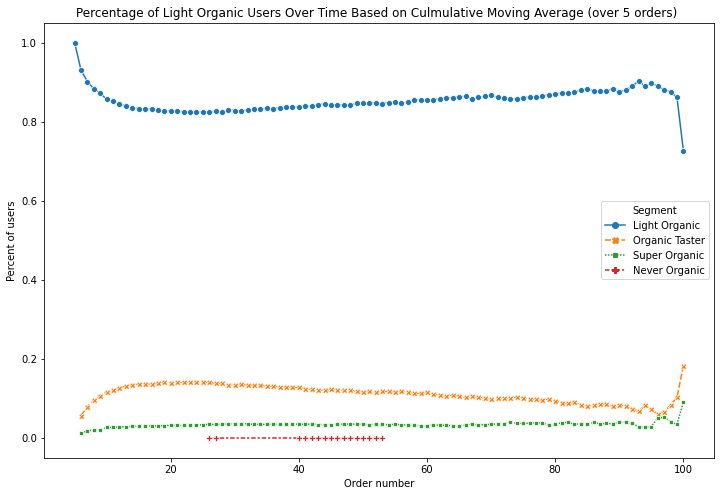

In [218]:
# Plot the percentage of users per order separated into the segments by a culmulative moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=L_O_plot_df, x="order_number", y = '%_users', hue="segment_CMA5", style='segment_CMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Percentage of Light Organic Users Over Time Based on Culmulative Moving Average (over 5 orders) ')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass

### Super Organic
What is the evolution of organic purchasing behavior of users who started off as Super Organic?

In [219]:
# Create a dataset of users who started off as Super Organic (order_number = 5)

# List of users who started off as Super Organic
S_O_list = user_behavior10[(user_behavior10['order_number'] == 5) & 
                            (user_behavior10['segment_CMA5'] == 'Super Organic')]['user_id'].tolist()

S_O_df = user_behavior10[user_behavior10['user_id'].isin(S_O_list)]

S_O_plot_df = S_O_df.groupby('order_number')['segment_CMA5'].value_counts().to_frame(name = 'users').reset_index()
S_O_plot_df['%_users'] = S_O_plot_df.users.div(S_O_plot_df.order_number.map(S_O_plot_df.groupby('order_number').sum().users))

S_O_plot_df.head(30)

,order_number,segment_CMA5,users,%_users
0,5,Super Organic,8428,1.000000
1,6,Super Organic,7077,0.839701
2,6,Light Organic,1351,0.160299
3,7,Super Organic,6389,0.758068
4,7,Light Organic,2039,0.241932
5,8,Super Organic,5861,0.695420
6,8,Light Organic,2567,0.304580
7,9,Super Organic,5470,0.649027
8,9,Light Organic,2958,0.350973
9,10,Super Organic,5373,0.637518


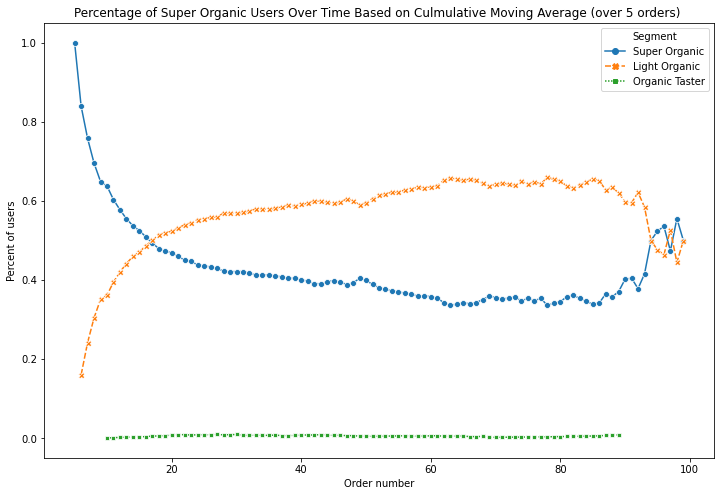

In [220]:
# Plot the percentage of users per order separated into the segments by a culmulative moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=S_O_plot_df, x="order_number", y = '%_users', hue="segment_CMA5", style='segment_CMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Percentage of Super Organic Users Over Time Based on Culmulative Moving Average (over 5 orders) ')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass